<img src="logo_UTN.svg" align="right" width="150" /> 

## Teoría de Circuitos II

### Ejercicio 4 TP5

#### Por Grupo 2


# Consigna

![Consigna](Consignas/Consigna.png "Consigna")

## Punto A

![Consigna](Consignas/ConsignaA1.png "Consigna")

![Consigna](Consignas/ConsignaA2.png "Consigna")

$X_1(z) = X(z) - X(z).c_1.Z^{-N}$

#### Biquad direct form 2
$X_3(z) = X_2(z).a_0$

$Y(z) = X_2(z).a_0.b_0 + X_2(z).a_0.z^{-1}.b_1 + X_2(z).a_0.z^{-2}.b_2$

Donde:

$X_2(z) = X_1(z) + X_2(z).a_0.z^{-1}.a_1 + X_2(z).a_0.z^{-2}.a_2$

$X_2(z).(-z^{-2}.a_2.a_0 - z^{-1}.a_1.a_0 + 1) = X_1(z)$

$X_2(z) = X_1(z).\frac{1}{(-z^{-2}.a_2.a_0 - z^{-1}.a_1.a_0 + 1)}$

Entonces:

$Y(z) =  X_2(z) . (z^{-2}.b_2.a_0 + z^{-1}.b_1.a_0 + b_0.a_0)$

$Y(z) =  X_1(z).\frac{1}{(-z^{-2}.a_2.a_0 - z^{-1}.a_1.a_0 + 1)} . (z^{-2}.b_2.a_0 + z^{-1}.b_1.a_0 + b_0.a_0)$

$Y(z) =  (X(z) - X(z).c_1.Z^{-N}).\frac{(z^{-2}.b_2.a_0 + z^{-1}.b_1.a_0 + b_0.a_0)}{(-z^{-2}.a_2.a_0 - z^{-1}.a_1.a_0 + 1)}$

$H(z) = \frac{Y(z)}{X(z)}  =  (1 - c_1.Z^{-N}).\frac{b_0 + z^{-1}.b_1 + z^{-2}.b_2}{1/a_0 - z^{-1}.a_1 - z^{-2}.a_2 }$

## Simulación

In [6]:
# Módulos para Jupyter

import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento
mpl.rcParams['figure.figsize'] = (25,15)

#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# NO ES IMPORTANTE
fig_sz_x = 14
fig_sz_y = 13
fig_dpi = 80 # dpi

#fig_font_family = 'Ubuntu'
fig_font_size = 16

plt.rcParams.update({'font.size':fig_font_size})
#plt.rcParams.update({'font.family':fig_font_family})

# módulo de SciPy
from scipy import signal as sig

# un módulo adaptado a mis necesidades
from splane import analyze_sys, pretty_print_bicuad_omegayq

In [21]:
def group_delay(ww, phase):
    
    groupDelay = -np.diff(phase)/np.diff(ww)
    
    return(np.append(groupDelay, groupDelay[-1]))

In [23]:
def print_digital(w_z, H_z, label):
    plt.close('all')
    # Modulo
    plt.title('Respuesta de modulo')
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Módulo [dB]')
    plt.plot(w_z, 20 * np.log10(np.abs(H_z)), label=label)

    # Fase
    plt.figure()
    plt.title('Respuesta de fase')
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Ángulo [rad]')
    fase = np.unwrap(np.angle(H_z))
    plt.plot(w_z, fase, label=label)
    plt.grid(which='both', axis='both')

    # Retardo
    gd_iir = group_delay(w_z, fase)
    plt.figure()
    plt.title('Retardo de grupo IIR')
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Demora [s]')
    plt.plot(w_z, gd_iir, label=label)
    plt.grid(which='both', axis='both')

## Punto B

![Consigna](Consignas/ConsignaB.png "Consigna")

#### · N = 3
$H(z) = \frac{1}{3}.\frac{1-z^{-3}}{1-z^{-1}}.\frac{z^{3}}{z^{3}}$

$H(z) = \frac{1}{3}.\frac{z^{3} - 1}{z^{3}-z^{2}}$

#### · N = 4
$H(z) = \frac{1}{4}.\frac{1-z^{-4}}{1-z^{-1}}.\frac{z^{4}}{z^{4}}$

$H(z) = \frac{1}{4}.\frac{z^{4} - 1}{z^{4}-z^{3}}$

#### · N = 5
$H(z) = \frac{1}{5}.\frac{1-z^{-5}}{1-z^{-1}}.\frac{z^{5}}{z^{5}}$

$H(z) = \frac{1}{5}.\frac{z^{5} - 1}{z^{5}-z^{4}}$


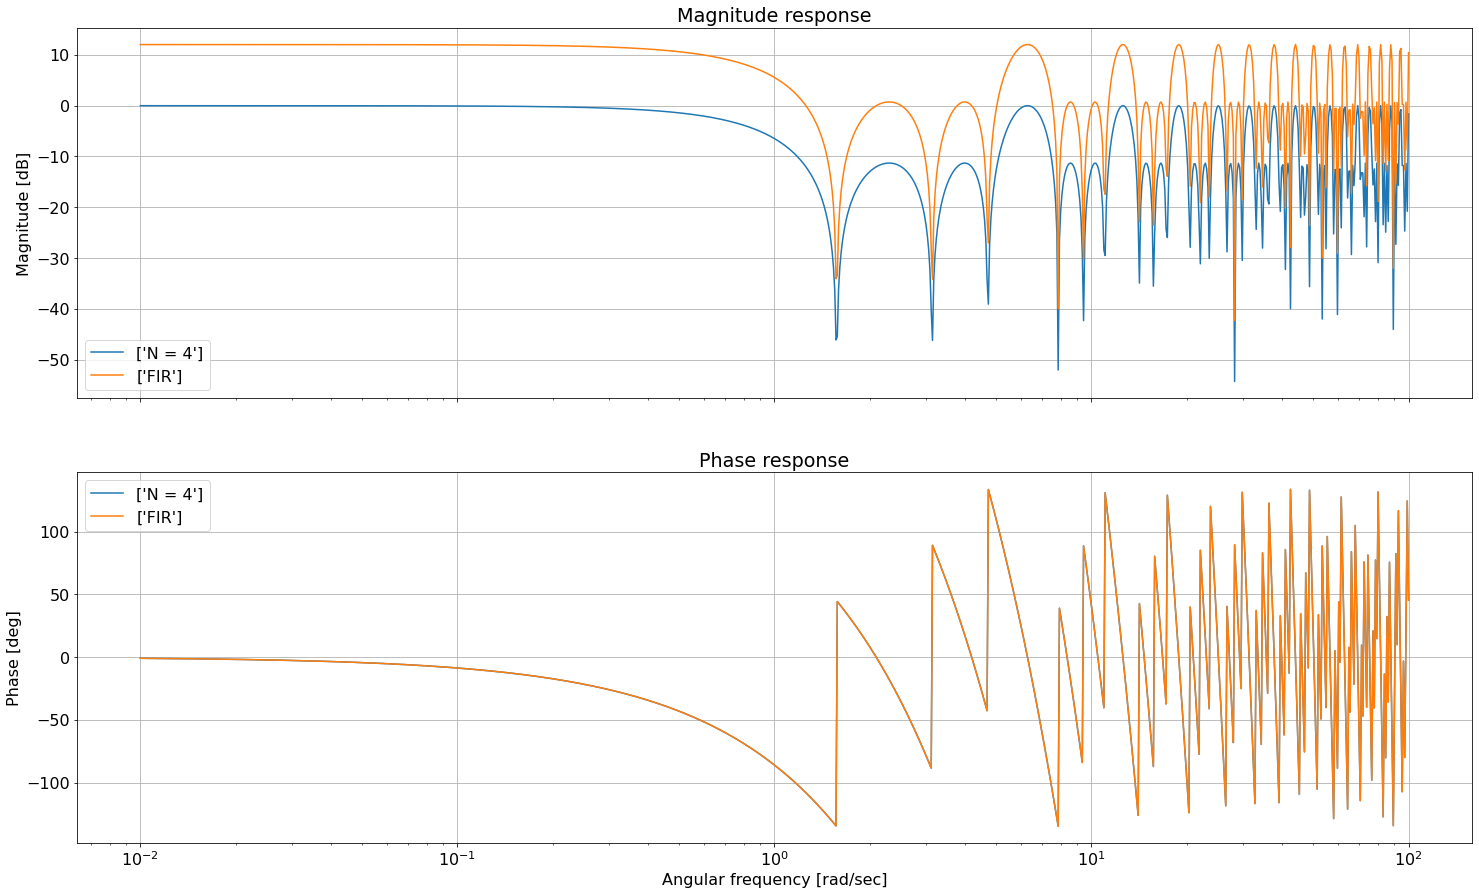

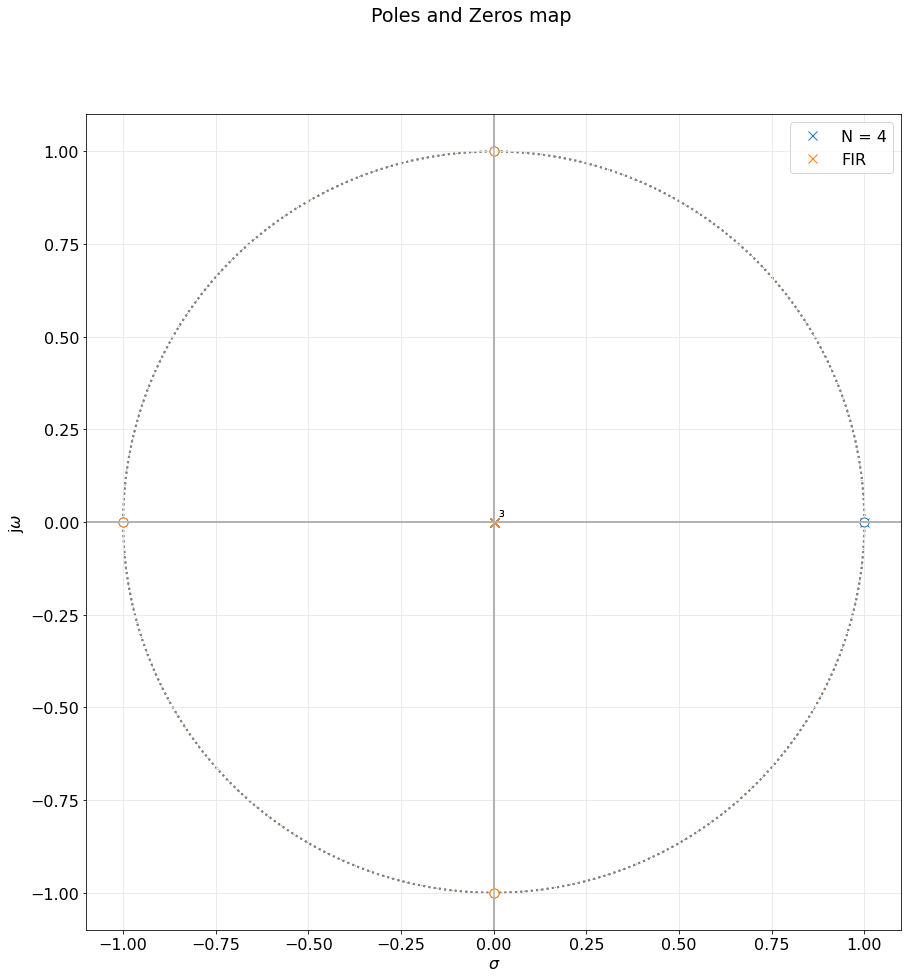

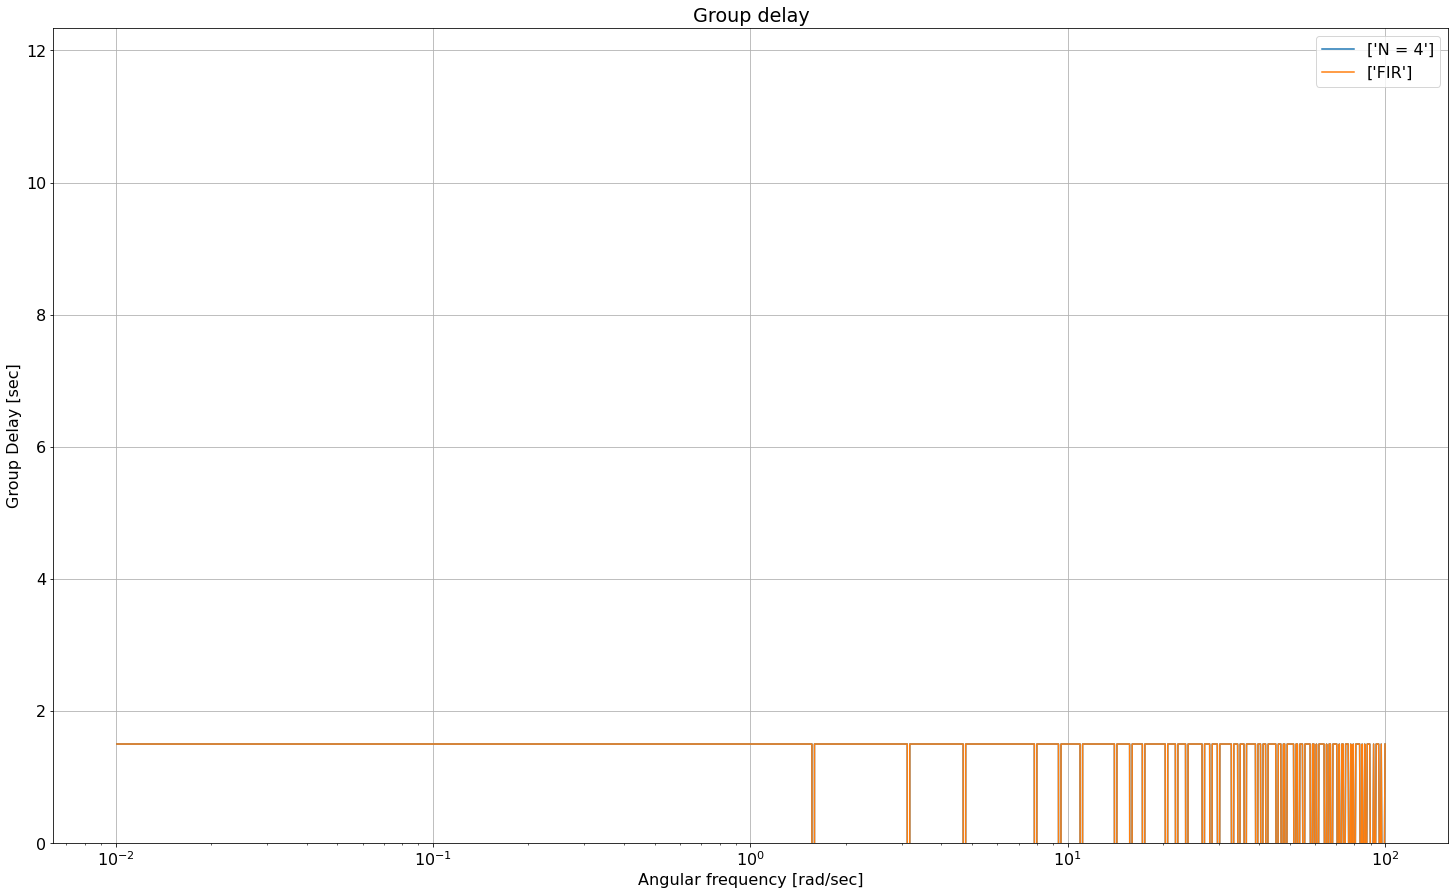

In [ ]:
# Coeficientes en potencias decreciente
num_3 = (1/3)*np.array([1, 0, 0, -1])
den_3 = np.array([1, -1, 0, 0])

num_4 = (1/4)*np.array([1, 0, 0, 0, -1])
den_4 = np.array([1, -1, 0, 0, 0])

num_5 = (1/5)*np.array([1, 0, 0, 0, 0, -1])
den_5 = np.array([1, -1, 0, 0, 0, 0])

num_fir = np.array([1, 1, 1, 1])
den_fir = np.array([1, 0, 0, 0])

# Módulo y fase
sos_n3 = sig.TransferFunction(num_3, den_3, dt = 1)
sos_n4 = sig.TransferFunction(num_4, den_4, dt = 1)
sos_n5 = sig.TransferFunction(num_5, den_5, dt = 1)
sos_fir = sig.TransferFunction(num_fir, den_fir, dt = 1)

all_sos = [sos_n4, sos_fir]
analyze_sys(all_sos, sys_name=['N = 4', 'FIR'])
#all_sos = [sos_n3, sos_n4, sos_n5, sos_fir]
#analyze_sys(all_sos, sys_name=['N = 3', 'N = 4', 'N = 5', 'FIR'])

### 1)
Es un filtro FIR, ya que todos sus polos están en el origen, tiene retardo de grupo constante.

### 2)
Ventajas? El FIR de media movil se comporta igual que este sistema para N+1. Es decir, para replicar un FIR de media movil con N=3, requiero N=4

### 3)
Podría implementarse $h_6(k) = (1,1,1,1,1,1,1)$ con N = 7:

FIR media movil N = 6:
$H(z) = \frac{z^{6} + z^{5} + z^{4} + z^{3} + z^{2} + z^{1} + 1}{z^{6}}$

##### N = 7
$H(z) = \frac{1}{7}.\frac{1-z^{-7}}{1-z^{-1}}.\frac{z^{7}}{z^{7}}$

$H(z) = \frac{1}{7}.\frac{z^{7} - 1}{z^{7}-z^{6}}$

## Punto C

![Consigna](Consignas/ConsignaC.png "Consigna")

#### Diferenciador de primer orden
$h(k) = (1,-1)$

$H(z) = 1-z^{-1} = \frac{z-1}{z}$

$H(z) = \frac{Y(z)}{X(z)}  =  (1 - c_1.Z^{-N}).\frac{b_0 + z^{-1}.b_1 + z^{-2}.b_2}{1/a_0 - z^{-1}.a_1 - z^{-2}.a_2 }$

$c_1=0, b_0=1, b_1=-1, b_2=0, a_0=1, a_1=0, a_2=0$




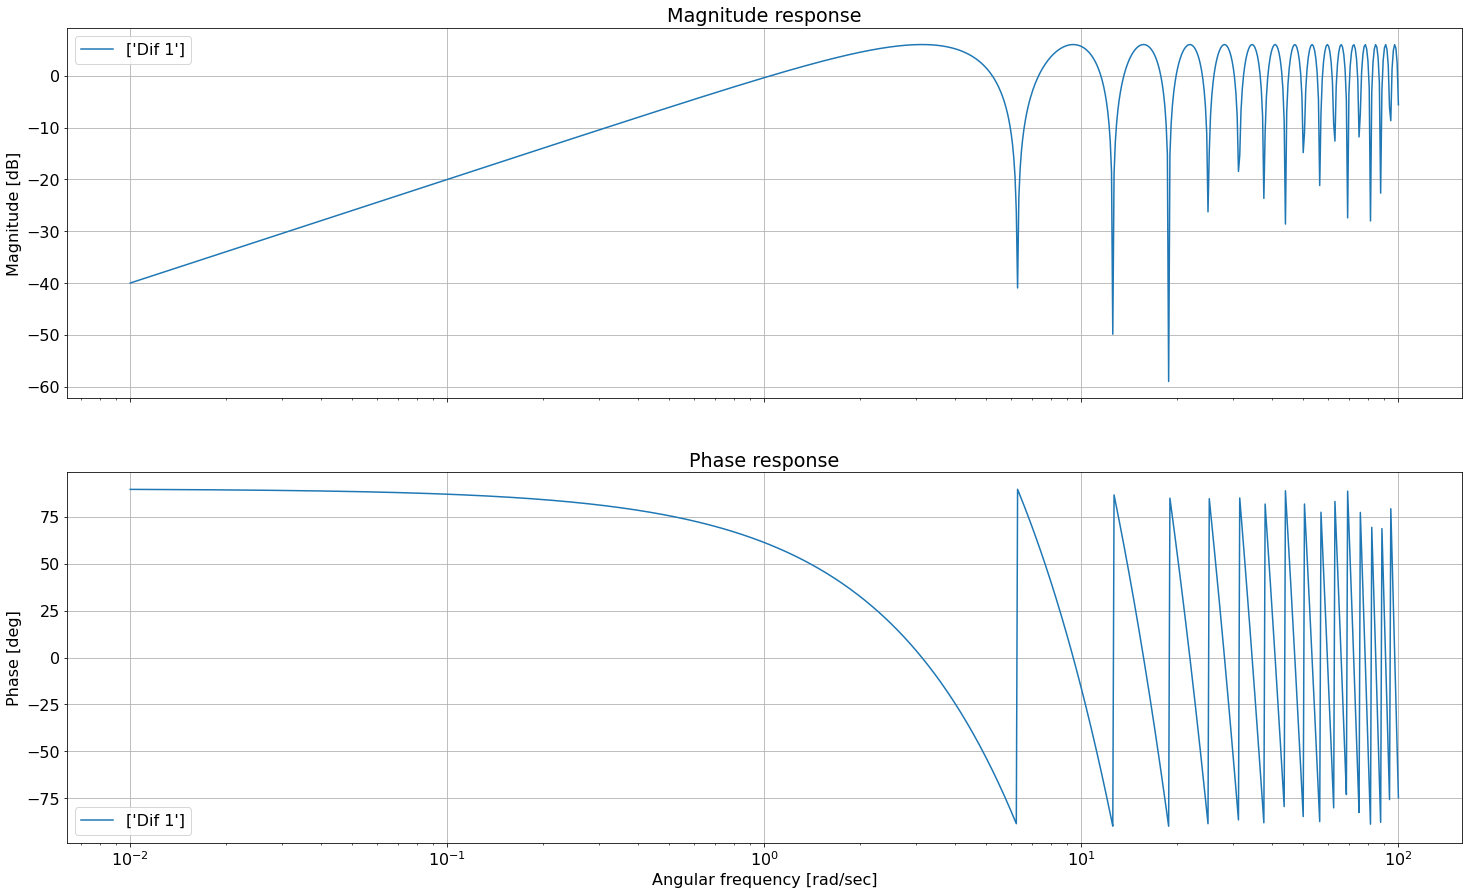

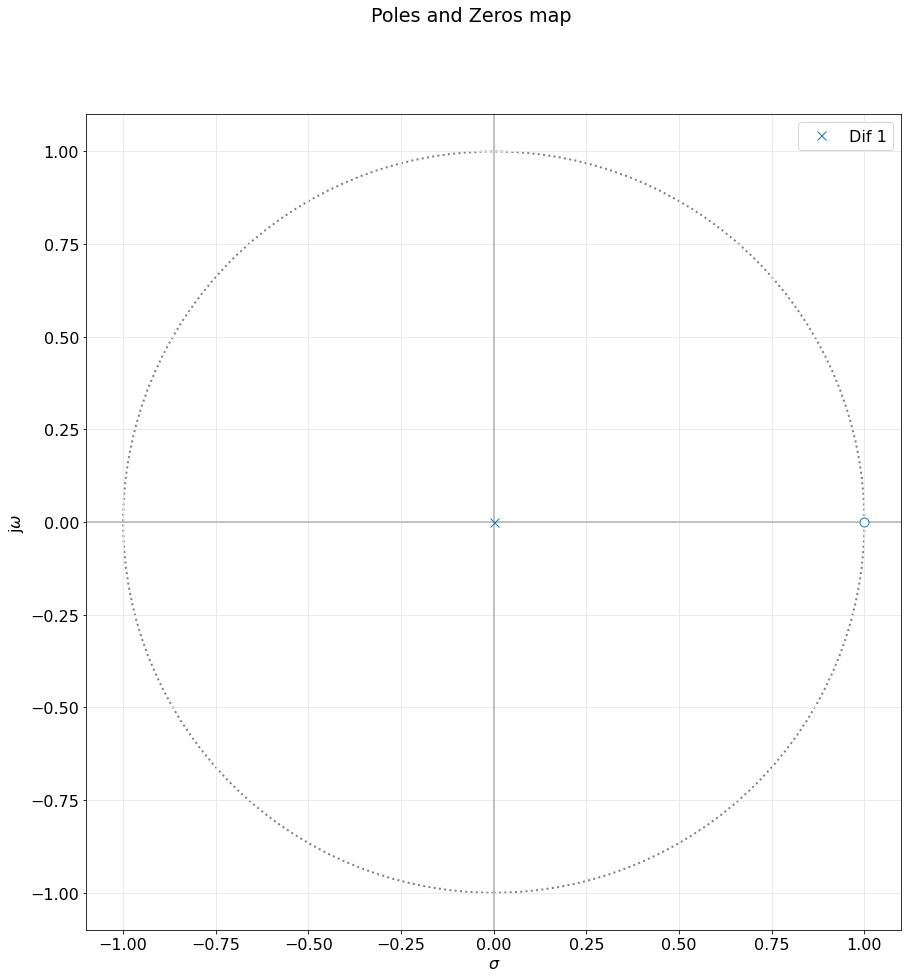

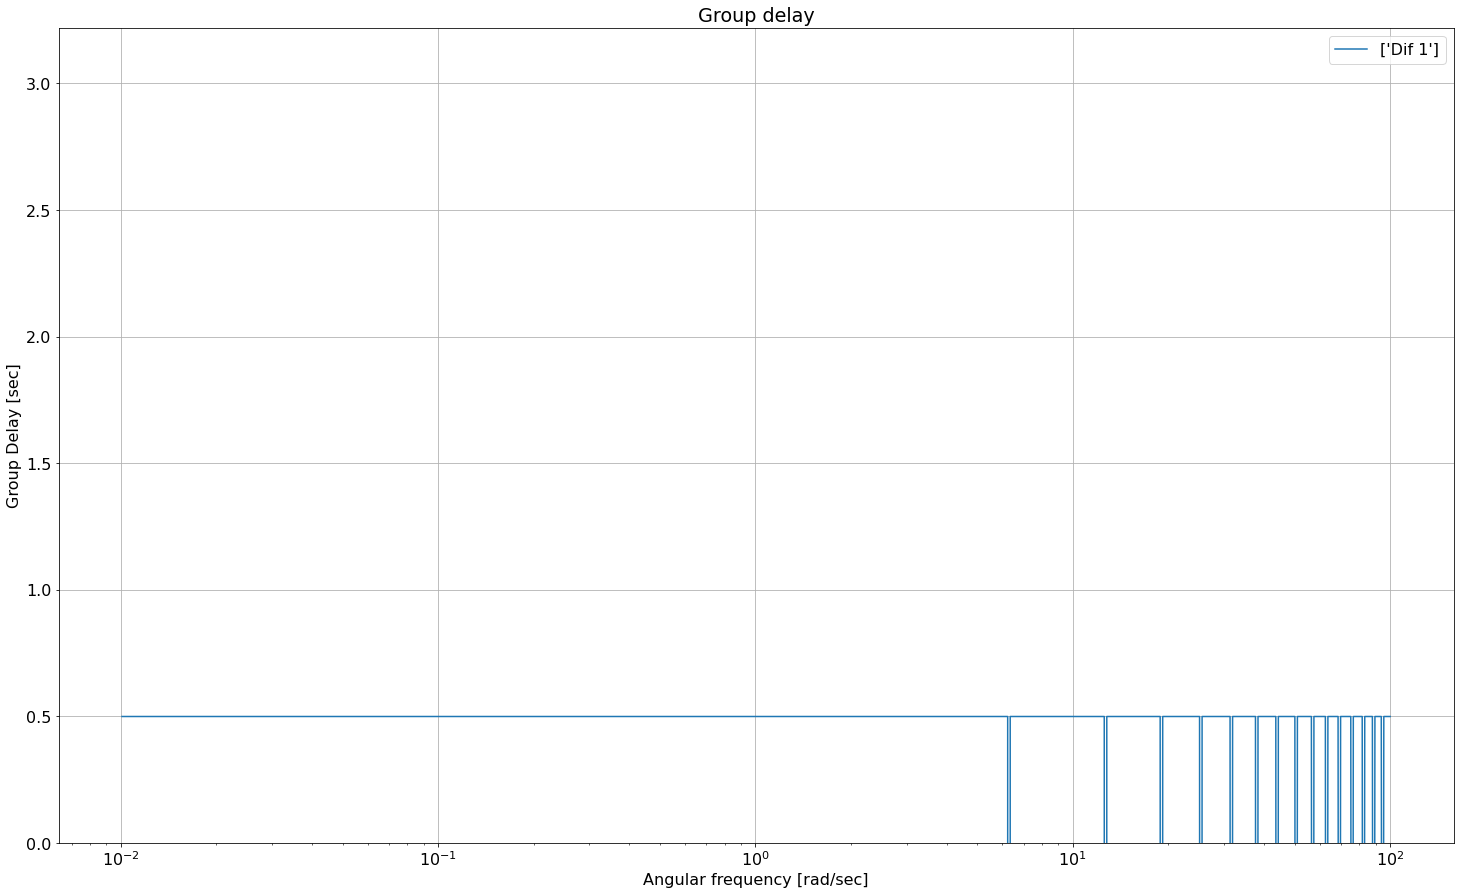

In [52]:
# Coeficientes en potencias decreciente
num_dif_1 = np.array([1, -1])
den_dif_1 = np.array([1, 0])

# Módulo y fase
sos_dif_1 = sig.TransferFunction(num_dif_1, den_dif_1, dt = 1)

all_sos = [sos_dif_1]
analyze_sys(all_sos, sys_name=['Dif 1'])
#all_sos = [sos_n3, sos_n4, sos_n5, sos_fir]
#analyze_sys(all_sos, sys_name=['N = 3', 'N = 4', 'N = 5', 'FIR'])

#### Diferenciador de segundo orden
$h(k) = (1,0,-1)$

$H(z) = 1-z^{-2} = \frac{z^{2}-1}{z^{2}}$

$H(z) = \frac{Y(z)}{X(z)}  =  (1 - c_1.Z^{-N}).\frac{b_0 + z^{-1}.b_1 + z^{-2}.b_2}{1/a_0 - z^{-1}.a_1 - z^{-2}.a_2 }$

$c_1=0, b_0=1, b_1=0, b_2=-1, a_0=1, a_1=0, a_2=0$




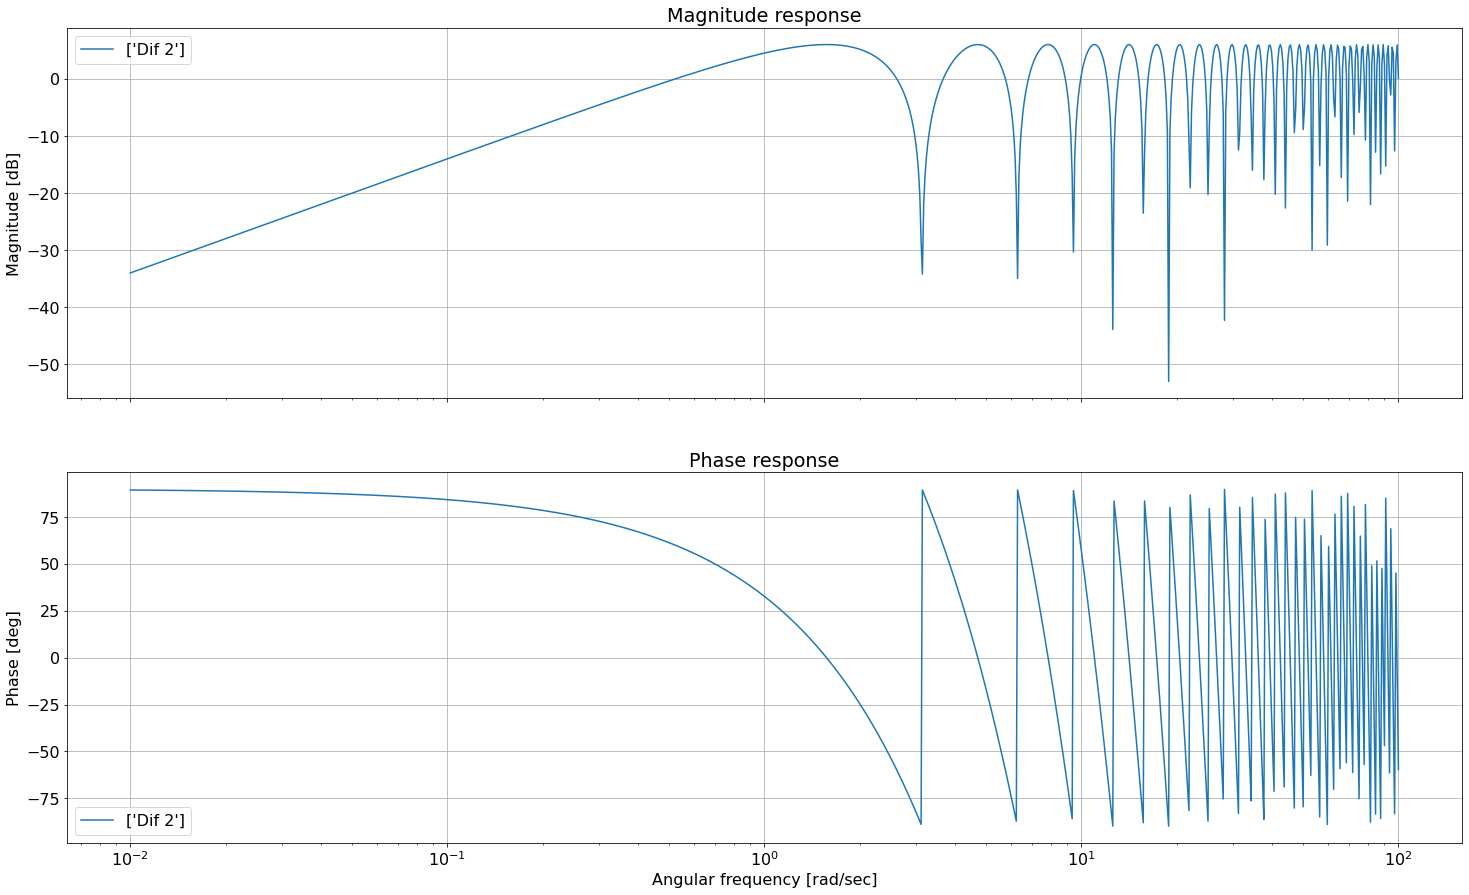

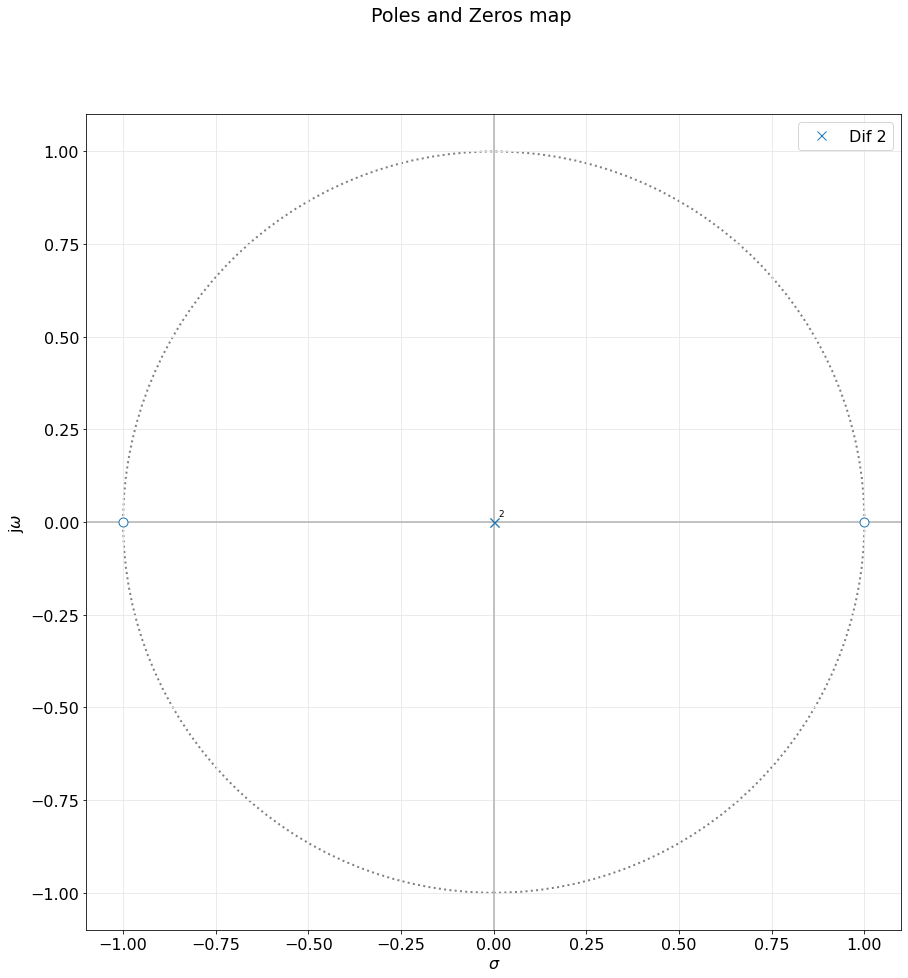

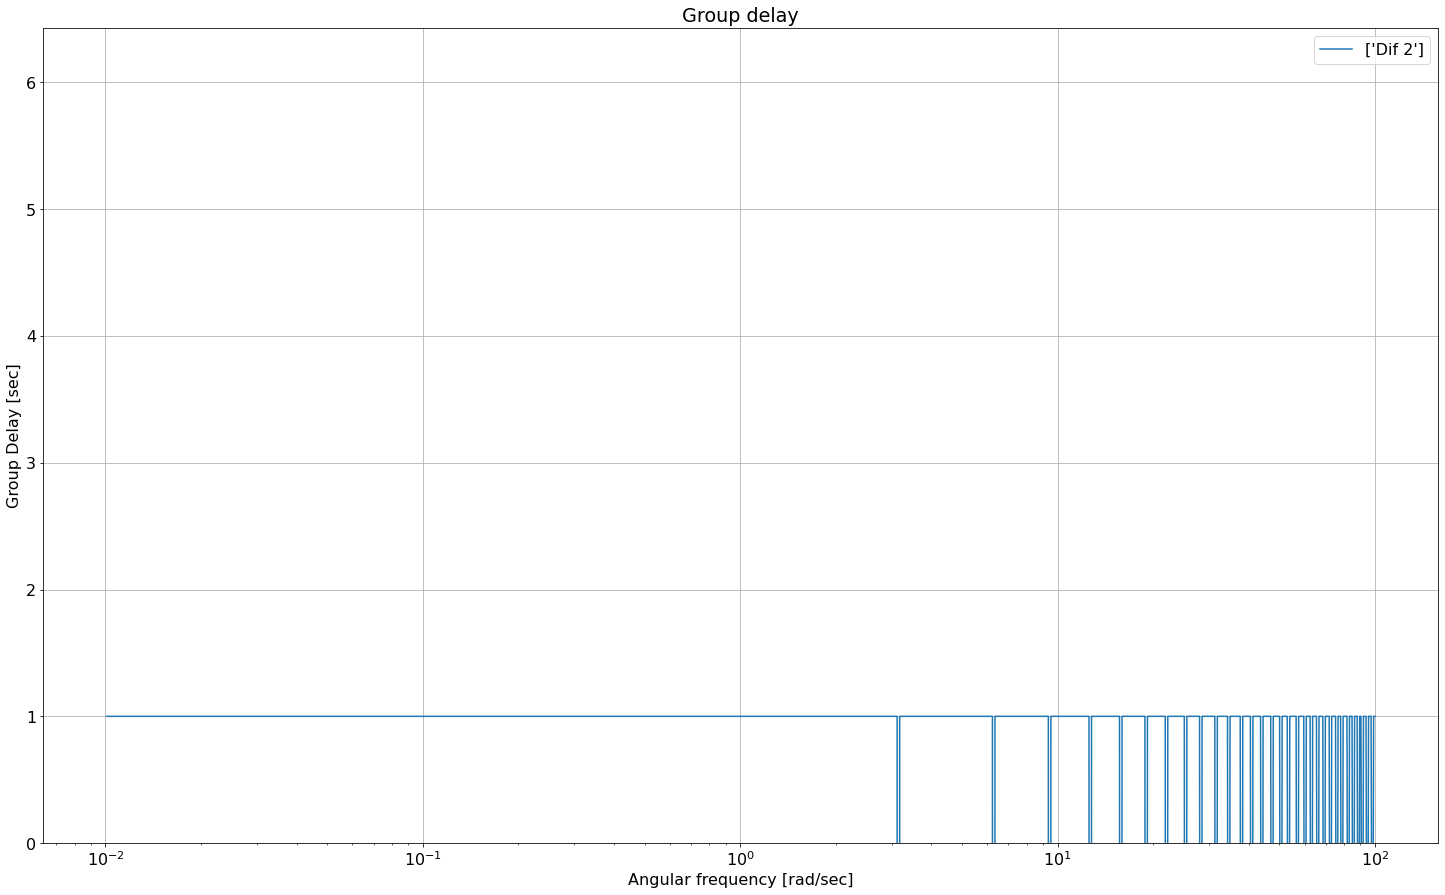

In [53]:
# Coeficientes en potencias decreciente
num_dif_2 = np.array([1, 0, -1])
den_dif_2 = np.array([1, 0, 0])

# Módulo y fase
sos_dif_2 = sig.TransferFunction(num_dif_2, den_dif_2, dt = 1)

all_sos = [sos_dif_2]
analyze_sys(all_sos, sys_name=['Dif 2'])
#all_sos = [sos_n3, sos_n4, sos_n5, sos_fir]
#analyze_sys(all_sos, sys_name=['N = 3', 'N = 4', 'N = 5', 'FIR'])

## Punto D

![Consigna](Consignas/ConsignaD.png "Consigna")

#### Integrador con pérdidas
$H(z) = \frac{Y(z)}{X(z)}  =  (1 - c_1.Z^{-N}).\frac{b_0 + z^{-1}.b_1 + z^{-2}.b_2}{1/a_0 - z^{-1}.a_1 - z^{-2}.a_2 }$

$a_0 = 1, a_1 = 1- \alpha, b_0 = \alpha, \alpha = 0.9$

$H(z) = \frac{Y(z)}{X(z)} = \frac{\alpha}{1 - z^{-1}.(1-\alpha)} = \frac{0.9}{1 - z^{-1}.(0.1)}$



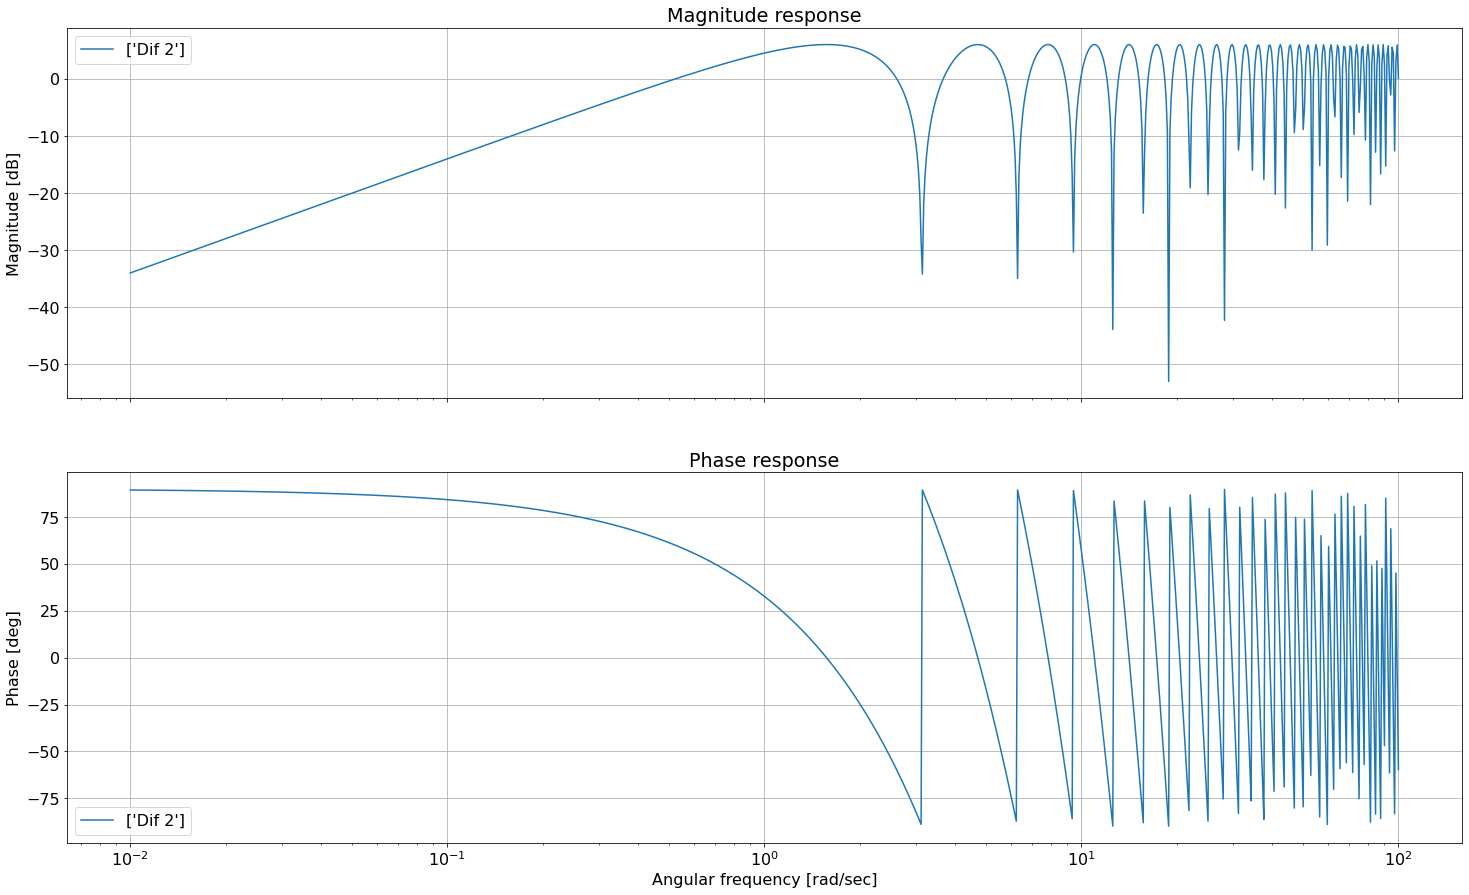

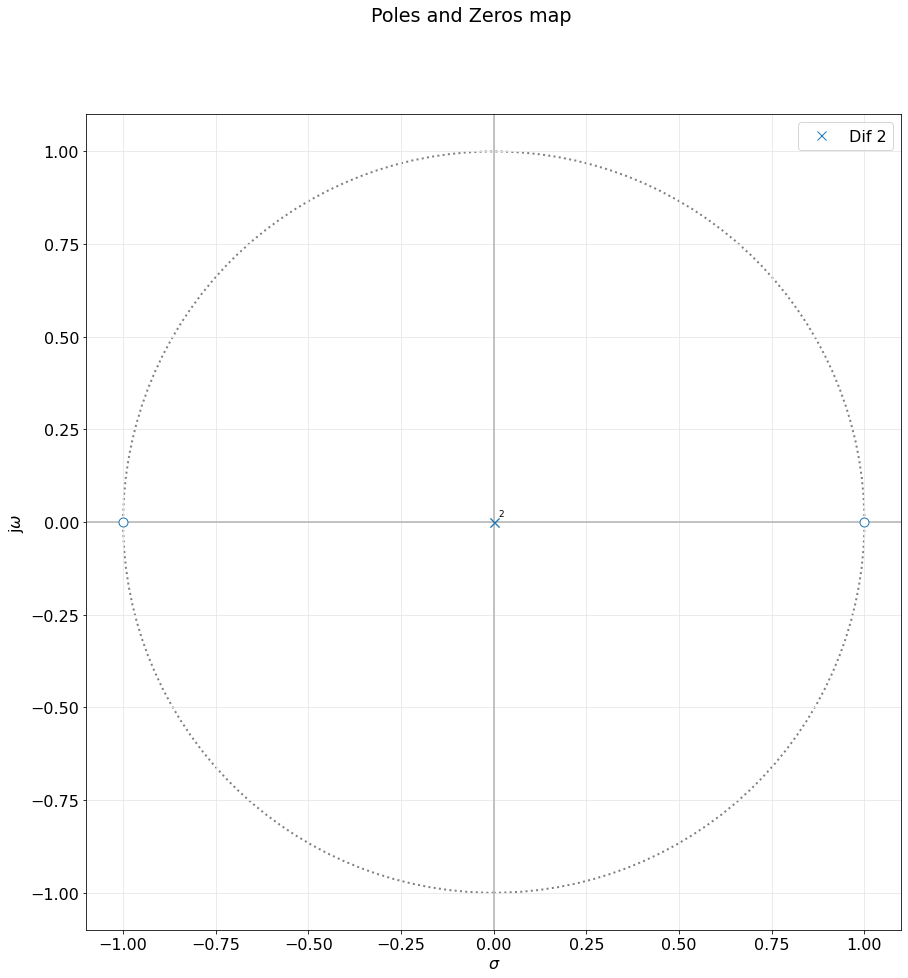

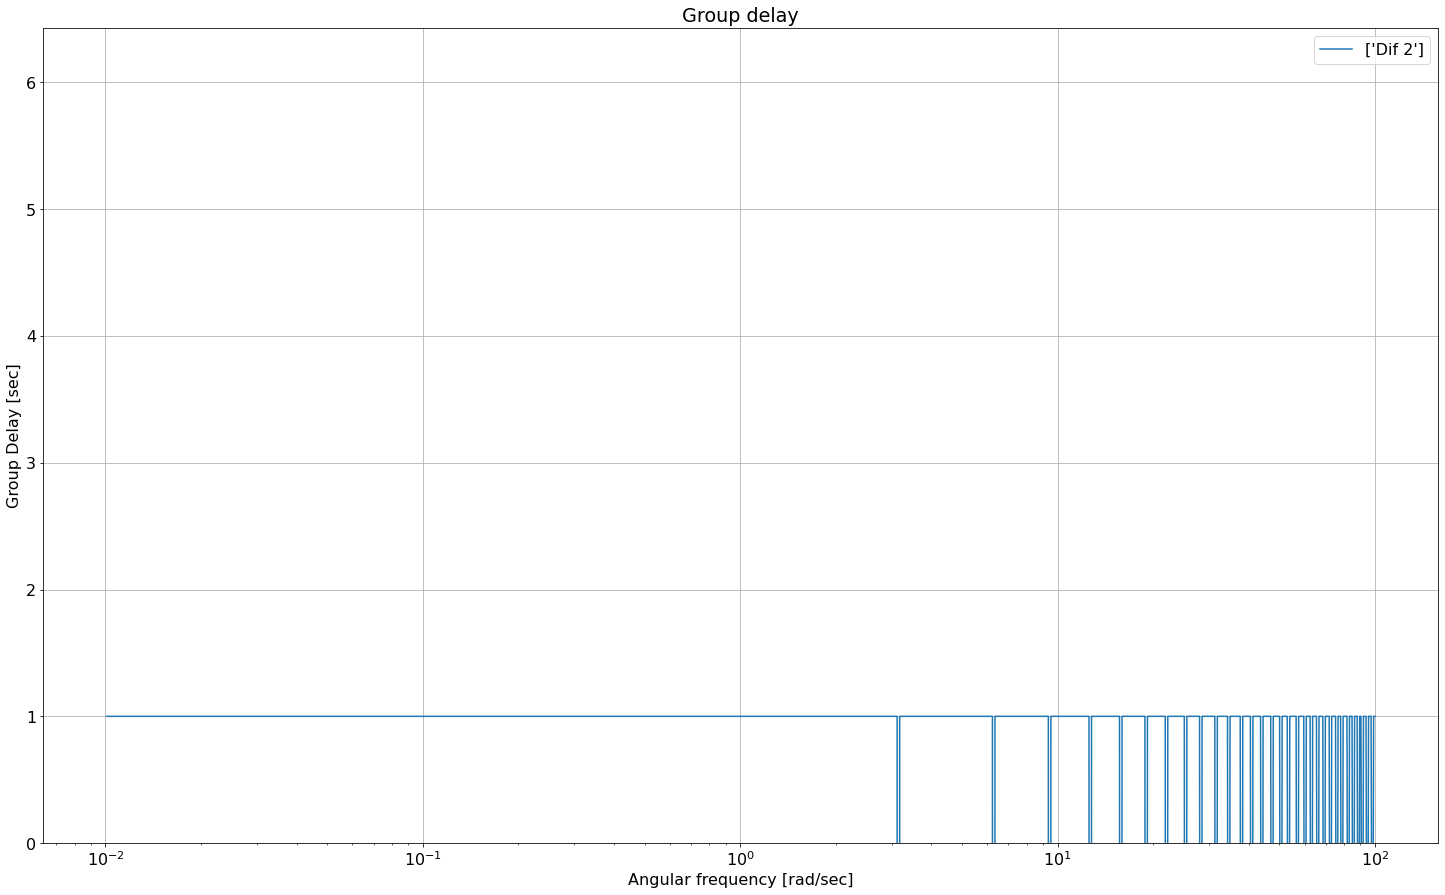

In [53]:
# Coeficientes en potencias decreciente
num_dif_2 = np.array([1, 0, -1])
den_dif_2 = np.array([1, 0, 0])

# Módulo y fase
sos_dif_2 = sig.TransferFunction(num_dif_2, den_dif_2, dt = 1)

all_sos = [sos_dif_2]
analyze_sys(all_sos, sys_name=['Dif 2'])
#all_sos = [sos_n3, sos_n4, sos_n5, sos_fir]
#analyze_sys(all_sos, sys_name=['N = 3', 'N = 4', 'N = 5', 'FIR'])